# Data visualization

## Prep steps: import libraries and dataset

In [1]:
# First import all libraries needed
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import itertools

In [2]:
# Then import a clean dataset with pandas
diamonds = pd.read_csv(r"C:\Users\Shinemet\Ironhack\IronAnna\Project4\diamonds_clean.csv")

# Keep a copy of fully encoded dataset for extended analysis purposes
d_enc = diamonds.copy()
cut_labels = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
d_enc['cut'] = d_enc['cut'].apply(lambda x: cut_labels[x])

# Finish cleaning the dataset
diamonds.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,0,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53926,0.72,Ideal,6,2,60.8,57.0,2757,5.75,5.76,3.50
53927,0.72,Good,6,2,63.1,55.0,2757,5.69,5.75,3.61
53928,0.70,Very Good,6,2,62.8,60.0,2757,5.66,5.68,3.56
53929,0.86,Premium,2,1,61.0,58.0,2757,6.15,6.12,3.74


## Plotting the data

*Let's try plotting identical subplots with different scales first, using scatter plots.*

### Scatter plots

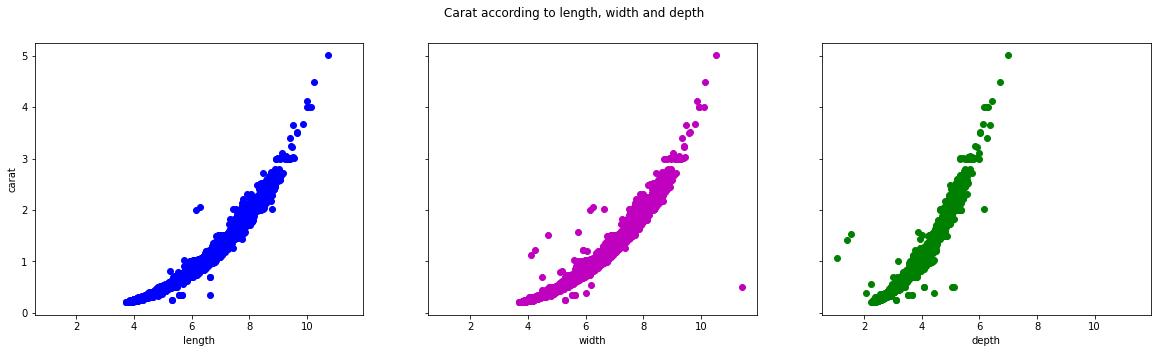

In [3]:
# Plotting the impact of length, width and depth on carat with a lineplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
fig.suptitle('Carat according to length, width and depth')

ax1.scatter(x='x', y='carat', c='b', data=diamonds)
ax1.set_xlabel('length')
ax1.set_ylabel('carat')
ax2.scatter(x='y', y='carat', c='m', data=diamonds)
ax2.set_xlabel('width')
ax3.scatter(x='z', y='carat', c='g', data=diamonds)
ax3.set_xlabel('depth')

# Hide y labels and y ticks for right plots.
for ax in fig.get_axes():
    ax.label_outer()

plt.show()

*Scatter plotting carat according to length, width and depth show slight variations in scale, steepness and outliers.*

### All plots

*Let's plot all the required plots as subplots in a single figure, using Matplotlib first.*

#### Using Matplotlib

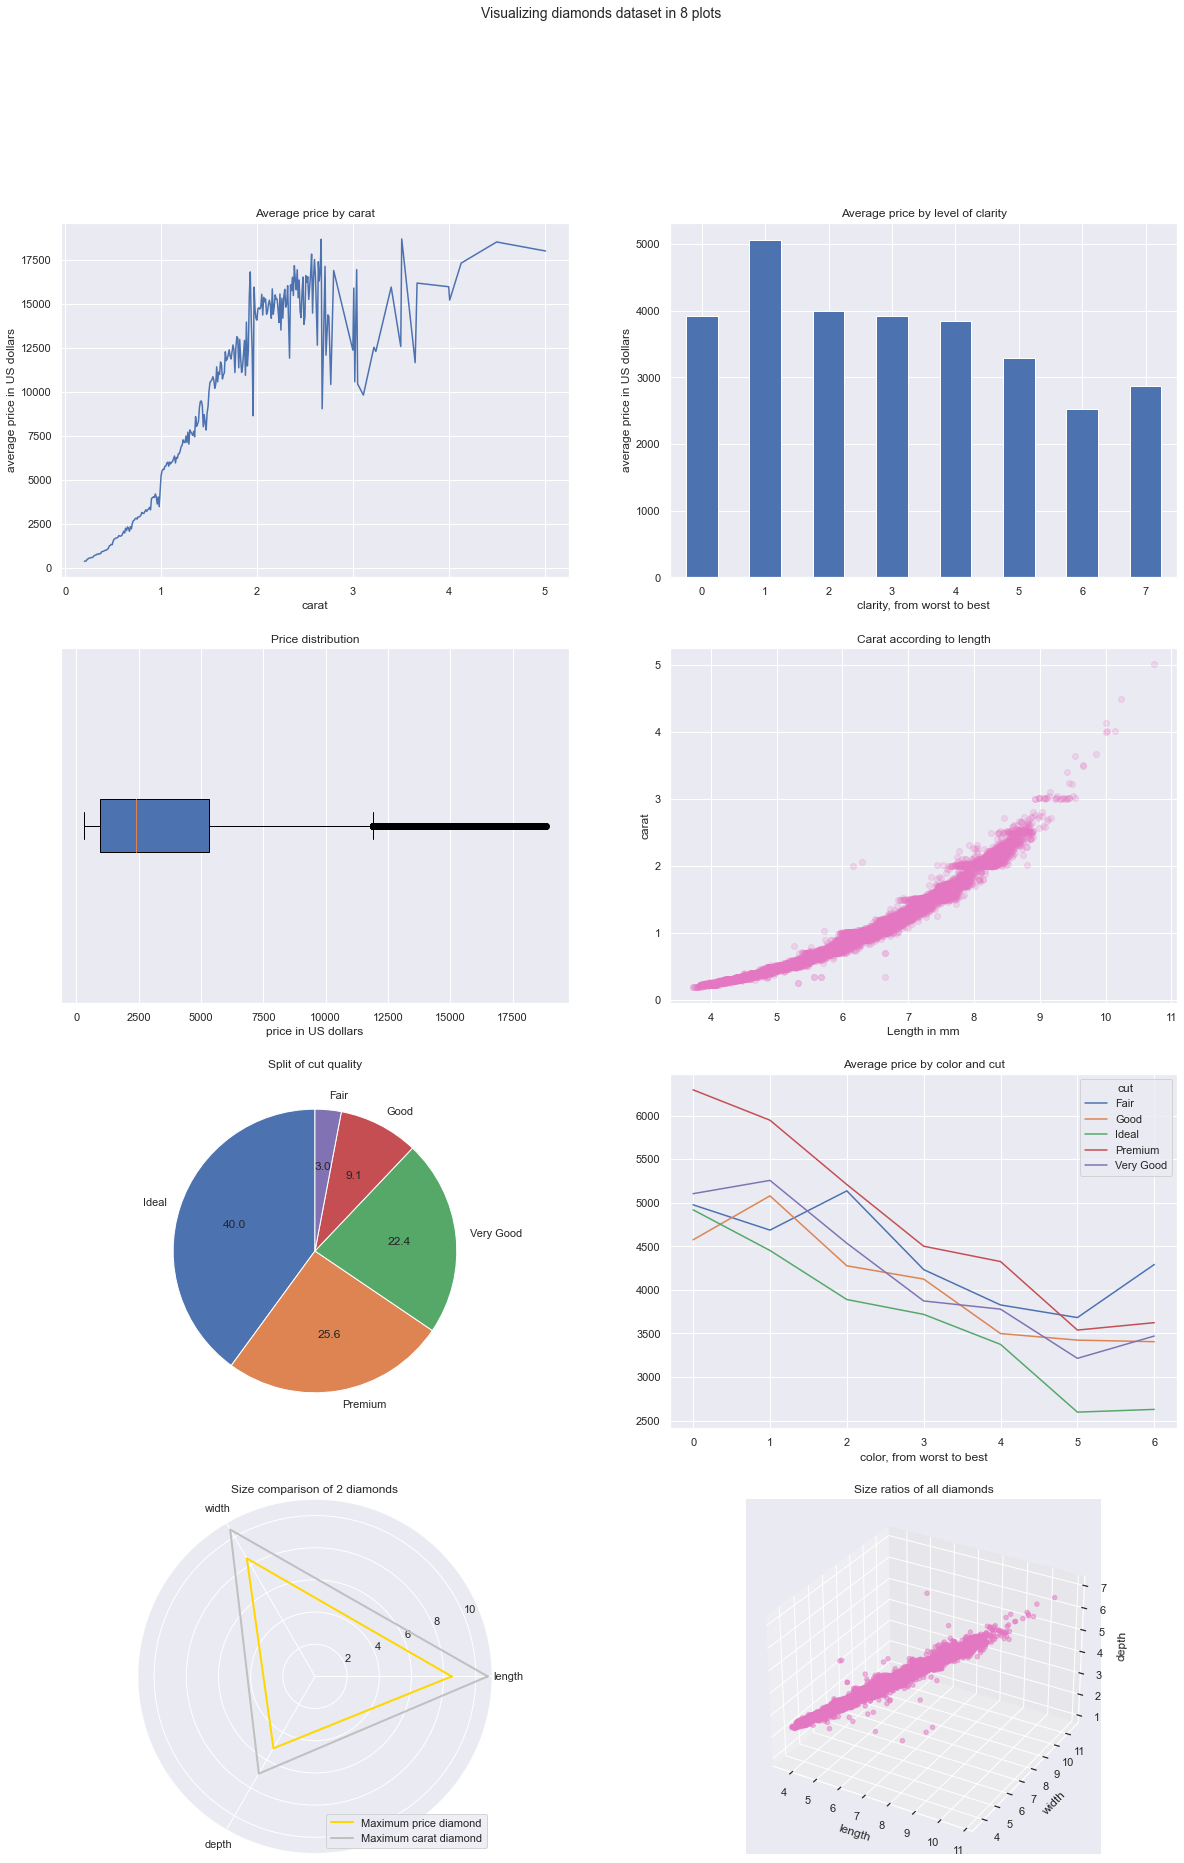

In [34]:
# Plotting all plots in one figure with 8 subplots
fig = plt.figure(figsize=(20, 30))
fig.suptitle('Visualizing diamonds dataset in 8 plots', fontsize=14)

# Line plot of price vs carat (example of correlation observed)
ax1 = fig.add_subplot(421)
carat_price = diamonds.groupby(['carat'])['price'].mean()
carat_price.plot(ax=ax1)
ax1.set_xlabel('carat')
ax1.set_ylabel('average price in US dollars')
ax1.set_title('Average price by carat')

# Barplot of price vs clarity (example of no correlation observed)
ax2 = fig.add_subplot(422)
carat_clarity = diamonds.groupby(['clarity'])['price'].mean()
carat_clarity.plot(kind='bar', ax=ax2, rot=0)
ax2.set_xlabel('clarity, from worst to best')
ax2.set_ylabel('average price in US dollars')
ax2.set_title('Average price by level of clarity')

# Boxplot of price
#bins = pd.cut(diamonds['carat'], bins=5)
#diamonds['price'].groupby(bins).boxplot(ax=ax[1,1])
ax3 = fig.add_subplot(423)
ax3.boxplot('price', vert=False, patch_artist=True, data=diamonds)
#patch.set_facecolor('tab:blue')
ax3.set_xlabel('price in US dollars')
ax3.yaxis.set_visible(False)
ax3.set_title('Price distribution')

# Scatter plot of carat and length
ax4 = fig.add_subplot(424)
ax4.scatter(x='x', y='carat', color='tab:pink', alpha=.2, data=diamonds)
ax4.set_xlabel('Length in mm')
ax4.set_ylabel('carat')
ax4.set_title('Carat according to length')

# Piechart of cut
ax5 = fig.add_subplot(425)
labels = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
ax5.pie(d_enc['cut'].value_counts(), labels=labels, autopct='%.1f', startangle=90, data=diamonds)
ax5.set_title('Split of cut quality')

# Multiple series chart of price by color and cut
ax6 = fig.add_subplot(426)
carat_size = diamonds.groupby(['color', 'cut'])['price'].mean()
carat_size.unstack().plot(ax=ax6)
ax6.set_xlabel('color, from worst to best')
ax6.set_title('Average price by color and cut')

# Radar plot and compare size of diamonds with max price value and max carat value
## First store size attributes of each diamond in a list
max_price = diamonds[(diamonds['price']==diamonds['price'].max())][['x', 'y', 'z']]
max_p = max_price.values.flatten().tolist()
max_p.append(max_p[0])

max_carat = diamonds[(diamonds['carat']==diamonds['carat'].max())][['x', 'y', 'z']]
max_c = max_carat.values.flatten().tolist()
max_c.append(max_c[0])

features = ["length", "width", "depth"]

## Plot the radar chart
ax7 = fig.add_subplot(427, projection='polar')
theta = np.linspace(0, 2 * np.pi, len(max_p)) #define radius/theta
lines, labels = plt.thetagrids(range(0, 360, int(360/len(features))), (features)) #arrange grid into equal parts of features
ax7.plot(theta, max_p, 'gold', linewidth=2) # plot max price diamond size
ax7.plot(theta, max_c, 'silver', linewidth=2) # plot max carat diamond size
ax7.legend(labels=('Maximum price diamond', 'Maximum carat diamond'), loc=4)
ax7.set_title('Size comparison of 2 diamonds')

# 3D chart
ax8 = fig.add_subplot(428, projection='3d')
ax8.scatter3D('x', 'y', 'z', data=diamonds, marker='o', color='tab:pink', alpha=.5)
ax8.set_xlabel('length')
ax8.set_ylabel('width')
ax8.set_zlabel('depth')
ax8.set_title('Size ratios of all diamonds')

plt.show()

*Let's plot the same subplots in seaborn this time.*

#### Using Seaborn

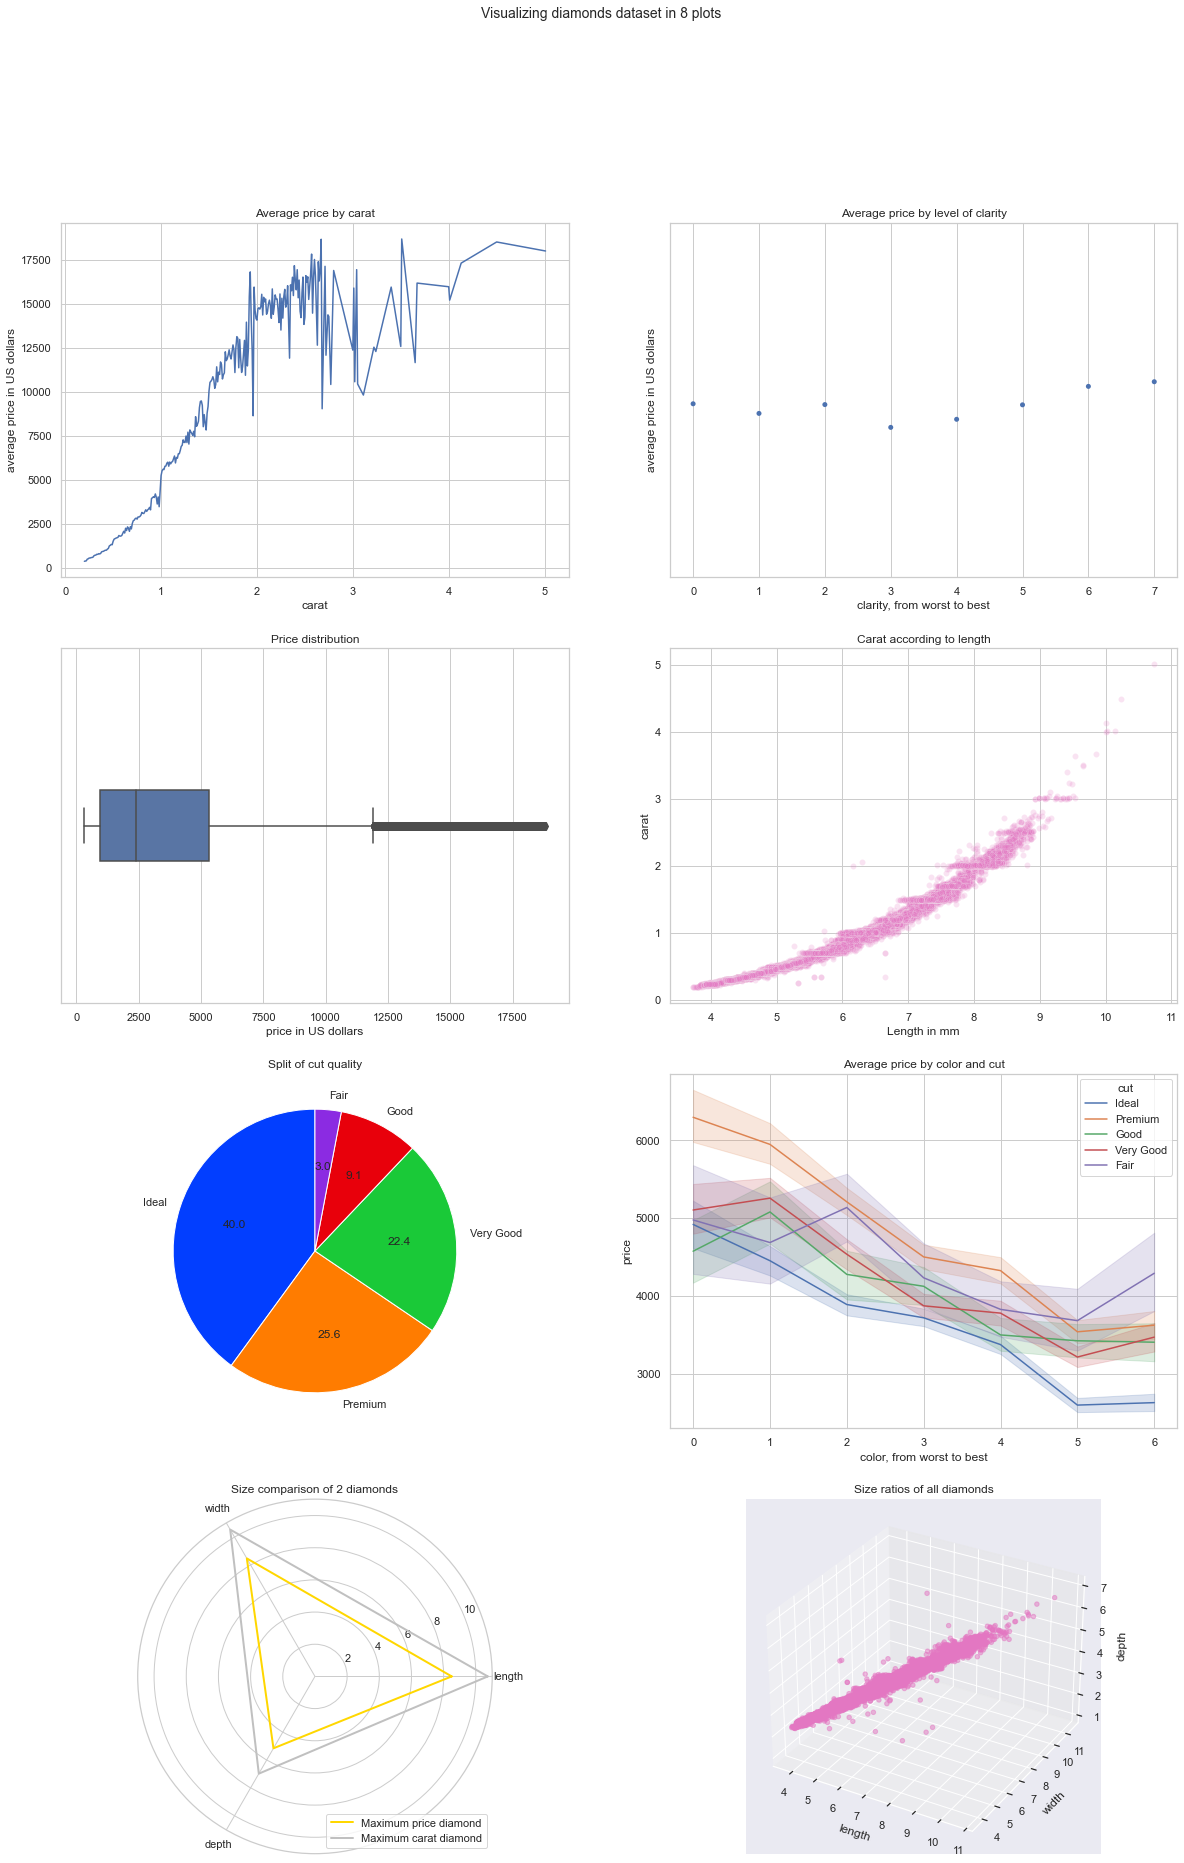

In [33]:
# Plotting all plots in one figure with 8 subplots
fig = plt.figure(figsize=(20, 30))
fig.suptitle('Visualizing diamonds dataset in 8 plots', fontsize=14)

sns.set_theme(style="whitegrid")

# Line plot of price vs carat (correlation observed)
ax1 = fig.add_subplot(421)
carat_price = diamonds.groupby(['carat'])['price'].mean()
sns.lineplot(ax=ax1, data=carat_price)
ax1.set_xlabel('carat')
ax1.set_ylabel('average price in US dollars')
ax1.set_title('Average price by carat')

# Barplot of price vs clarity (no correlation observed)
ax2 = fig.add_subplot(422)
carat_clarity = diamonds.groupby(['clarity'])['price'].mean()
sns.stripplot(x=carat_clarity.index, ax=ax2)
ax2.set_xlabel('clarity, from worst to best')
ax2.set_ylabel('average price in US dollars')
ax2.set_title('Average price by level of clarity')

# Boxplot of price
#bins = pd.cut(diamonds['carat'], bins=5)
#diamonds['price'].groupby(bins).boxplot(ax=ax[1,1])
ax3 = fig.add_subplot(423)
sns.boxplot(x='price', ax=ax3, width=.2, data=diamonds)
#patch.set_facecolor('tab:blue')
ax3.set_xlabel('price in US dollars')
ax3.yaxis.set_visible(False)
ax3.set_title('Price distribution')

# Scatter plot of carat and length
ax4 = fig.add_subplot(424)
sns.scatterplot(x='x', y='carat', color='tab:pink', alpha=.2, ax=ax4, data=diamonds)
ax4.set_xlabel('Length in mm')
ax4.set_ylabel('carat')
ax4.set_title('Carat according to length')


# Piechart of cut: no piechart in seaborn, let's use seaborn color palette
ax5 = fig.add_subplot(425)
labels = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
colors = sns.color_palette('bright')
ax5.pie(d_enc['cut'].value_counts(), labels=labels, autopct='%.1f', colors=colors, startangle=90, data=diamonds)
ax5.set_title('Split of cut quality')

# Multiple series chart: reorder colors like pie chart
ax6 = fig.add_subplot(426)
carat_size = diamonds.groupby(['color', 'cut'])['price'].mean()
sns.lineplot(ax=ax6, x='color', y='price', hue='cut', data=diamonds)
ax6.set_xlabel('color, from worst to best')
ax6.set_title('Average price by color and cut')

# Radar plot and compare size of diamonds with max price value and max carat value
## First store size attributes of each diamond in a list
max_price = diamonds[(diamonds['price']==diamonds['price'].max())][['x', 'y', 'z']]
max_p = max_price.values.flatten().tolist()
max_p.append(max_p[0])

max_carat = diamonds[(diamonds['carat']==diamonds['carat'].max())][['x', 'y', 'z']]
max_c = max_carat.values.flatten().tolist()
max_c.append(max_c[0])

features = ["length", "width", "depth"]

## Plot the radar chart
ax7 = fig.add_subplot(427, projection='polar')
theta = np.linspace(0, 2 * np.pi, len(max_p)) #define radius/theta
lines, labels = plt.thetagrids(range(0, 360, int(360/len(features))), (features)) #arrange grid into equal parts of features
sns.scatterplot(theta, max_p, 'gold', linewidth=2, ax=ax7) # plot max price diamond size
sns.scatterplot(theta, max_c, 'silver', linewidth=2, ax=ax7) # plot max carat diamond size
ax7.legend(labels=('Maximum price diamond', 'Maximum carat diamond'), loc=4)
ax7.set_title('Size comparison of 2 diamonds')

# 3D chart: no seaborn 3D chart, let's try otherwise
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")
ax8 = fig.add_subplot(428, projection='3d')
x = diamonds['x']
y = diamonds['y']
z = diamonds['z']
ax8.scatter(x, y, z, marker='o', color='tab:pink', alpha=.5)
ax8.set_xlabel('length')
ax8.set_ylabel('width')
ax8.set_zlabel('depth')
ax8.set_title('Size ratios of all diamonds')


plt.show()